# Big Data Mart Sales Problem
Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

# Importing all necesary libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

Loading the data by reading the csv file as data frame

In [79]:
traindata=pd.read_csv('bigdatamart_train.csv')
testdata=pd.read_csv('bigdatamart_test.csv')

Exploratory Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

Statistical summary
Summarizing your dataset through descriptive statistics, to use a variety of measurements to better understand your dataset.

shape function
shape function gives the dimention of dataframe

In [80]:
traindata.shape

(8523, 12)

we have 8523 rows and 12 columns

In [81]:
testdata.shape

(5681, 11)

we have 5681 rows and 11 columns

In [82]:
traindata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [83]:
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


head() function
head() function is to display the first 5 rows of dataframe

In [84]:
traindata.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [85]:
testdata.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


tail() function
tail() function is use to display last 5 row of data frame

In [86]:
traindata.sample(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4076,DRH39,NaN,Low Fat,0.092241,Dairy,75.8670,OUT027,1985,Medium,Tier 3,Supermarket Type3,2450.1440
7554,FDZ22,NaN,Low Fat,0.079262,Snack Foods,81.8250,OUT019,1985,Small,Tier 1,Grocery Store,83.2250
7592,FDI26,NaN,Low Fat,0.034718,Canned,179.4344,OUT027,1985,Medium,Tier 3,Supermarket Type3,6066.7696
1409,FDA04,NaN,Regular,0.066407,Frozen Foods,259.7962,OUT027,1985,Medium,Tier 3,Supermarket Type3,5697.9164
1764,FDX21,7.05,Low Fat,0.085312,Snack Foods,107.4912,OUT018,2009,Medium,Tier 3,Supermarket Type2,982.7208
5506,FDV59,13.35,LF,0.000000,Breads,217.6166,OUT018,2009,Medium,Tier 3,Supermarket Type2,3265.7490
4580,FDV39,11.30,Low Fat,0.007321,Meat,197.7426,OUT017,2007,NaN,Tier 2,Supermarket Type1,2570.6538
1580,FDI16,14.00,Regular,0.136329,Frozen Foods,54.8640,OUT018,2009,Medium,Tier 3,Supermarket Type2,319.5840


In [87]:
testdata.sample(12)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1910,NCP43,17.750,Low Fat,0.030680,Others,178.0660,OUT017,2007,NaN,Tier 2,Supermarket Type1
3360,FDE32,20.700,Low Fat,0.048835,Fruits and Vegetables,36.5506,OUT049,1999,Medium,Tier 1,Supermarket Type1
2902,NCC19,6.570,Low Fat,0.097077,Household,191.6820,OUT045,2002,NaN,Tier 2,Supermarket Type1
5415,FDC60,5.425,Regular,0.114939,Baking Goods,88.1514,OUT018,2009,Medium,Tier 3,Supermarket Type2
4606,FDV21,11.500,Low Fat,0.171349,Snack Foods,125.7704,OUT049,1999,Medium,Tier 1,Supermarket Type1
1132,FDB32,20.600,Low Fat,0.023501,Fruits and Vegetables,95.5778,OUT045,2002,NaN,Tier 2,Supermarket Type1
1144,FDY08,9.395,Regular,0.170933,Fruits and Vegetables,140.5838,OUT013,1987,High,Tier 3,Supermarket Type1
3245,FDK33,17.850,Low Fat,0.018806,Snack Foods,214.9560,OUT010,1998,NaN,Tier 3,Grocery Store
1769,FDY02,8.945,Regular,0.087573,Dairy,261.1910,OUT013,1987,High,Tier 3,Supermarket Type1
4943,FDD20,14.150,Low Fat,0.000000,Fruits and Vegetables,123.3046,OUT049,1999,Medium,Tier 1,Supermarket Type1


sample() function
sample() function is show the sample randomly

dtypes function
dtypes is use to disply the datatype of data frame

In [88]:
traindata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In traindata dataframe we hava {Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales} are float64 dtype and Outlet_Establishment_Year in int64 dtype and {Item_Identifier, Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type} are in object dtype

In [89]:
testdata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In testdata dataframe we hava {Item_Weight, Item_Visibility, Item_MRP} are float64 dtype and Outlet_Establishment_Year in int64 dtype and {Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type} are in object dtype

info() function
info() function gives the column names, non-null count, dtype of dataframe,Range Index,data columns,memory usage

In [90]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In traindata dataframe

we have 12 columns, RangeIndex 8523, and 2 columns has null values and we have 4 columns are float64 dtype, 1 column int64 dtype,7 coulumns are object dtype

In [91]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In testdata dataframe

we have 11 columns,RangeIndex 5681,2 columns have null values and we have 3 columns are float64 dtype and 1 column is int64 dtype and 7 columns are object dtypes

isnull() function
isnull() function is use to know the null values in data frame, it give th values True and False

if value is True it indicates null vlaue,else it give false

In [92]:
traindata.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [93]:
testdata.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


isnull().sum() function
isnull().sum() it give the count of null values present in column

In [94]:
traindata.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weights has 1463 null values, Outlet_Size has 2410 null values

In [95]:
testdata.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_weight has 976 nullvalues,Outlet_size has 1606 null values

# Describe the data
describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column

In [96]:
traindata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


we got only 5 columns in this describe because remaining columns are in objective type

and we have null values in Item_Weight coulumn

# concate the traindata and testdata in one dataframe

In [97]:
traindata['source']='train'
testdata['source']='test'
df=pd.concat([traindata,testdata],ignore_index=True)

In [98]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


# Data Visualization
Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.

we are using two libraries

1.matplotlib.pyplot

2.seaborn

plot a heatmap to show the null values

<AxesSubplot:>

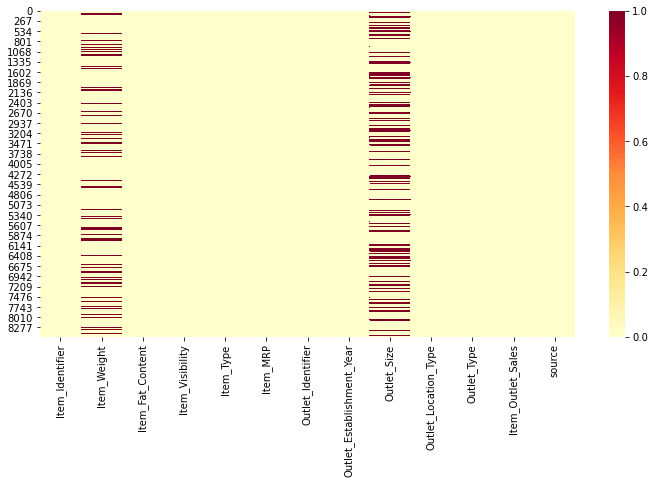

In [99]:
plt.figure(figsize=(12,6))
sns.heatmap(traindata.isnull(),cmap='YlOrRd')

the dark lines indicates the null values in the train data frame

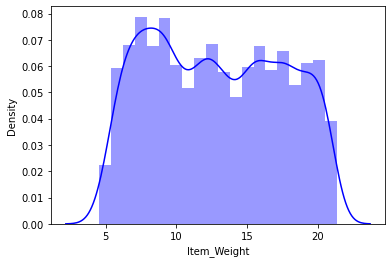

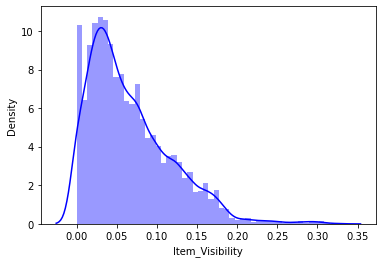

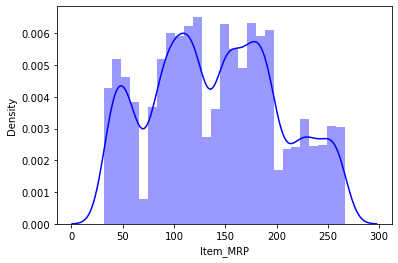

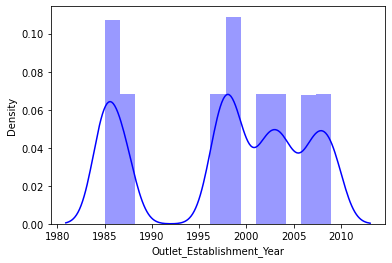

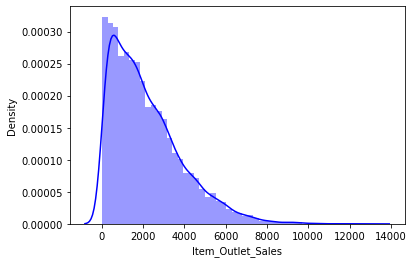

In [100]:
for i in traindata.describe().columns:
    sns.distplot(traindata[i].dropna(),color='blue')
    plt.show()

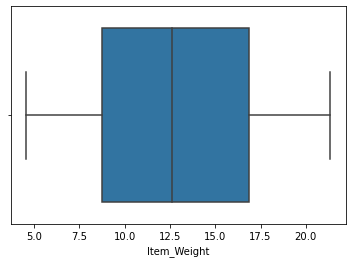

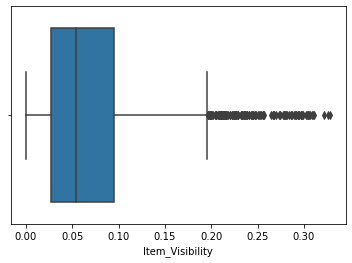

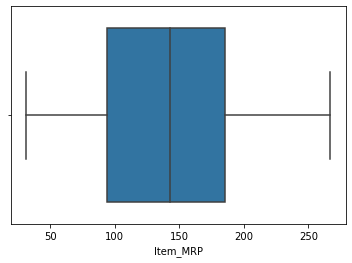

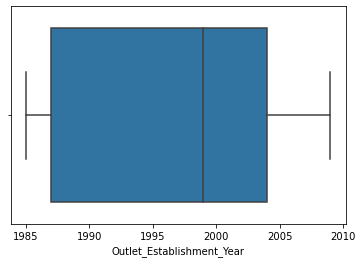

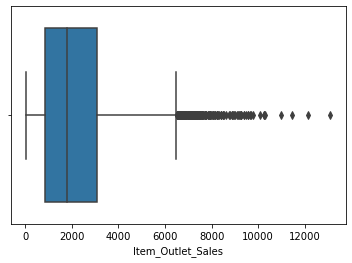

In [101]:
for i in traindata.describe().columns:
    sns.boxplot(traindata[i].dropna())
    plt.show()

# Data distribution in Item_Type feature

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

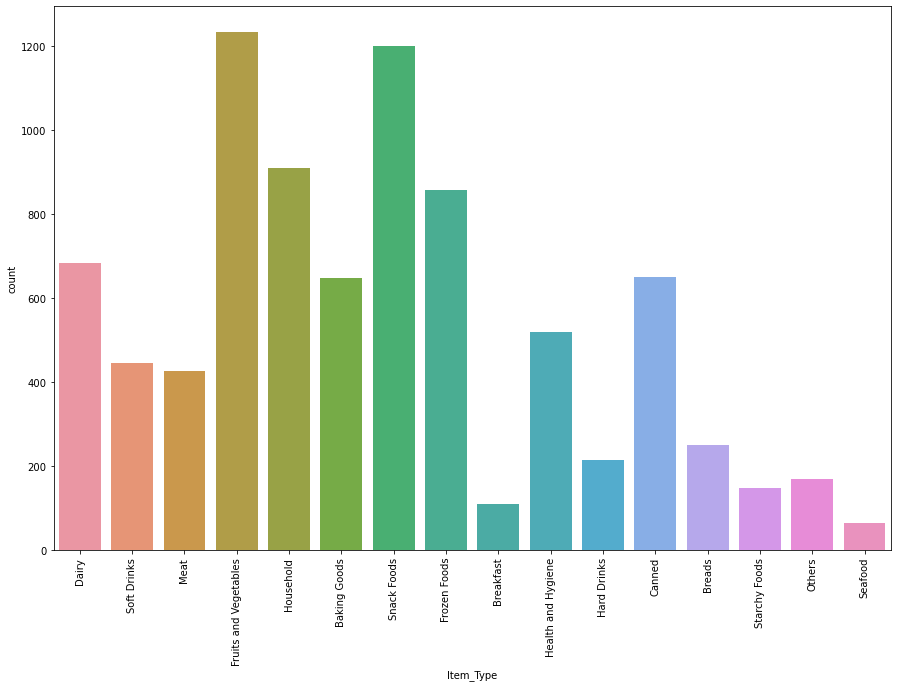

In [102]:
plt.figure(figsize=(15,10))
sns.countplot(traindata.Item_Type)
plt.xticks(rotation=90)

In [103]:
traindata.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

# data distribution Outlet_Type feature

In [104]:
traindata['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

we have 4 types of Outlet_Type and most of the outlets are supermaket Type1

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

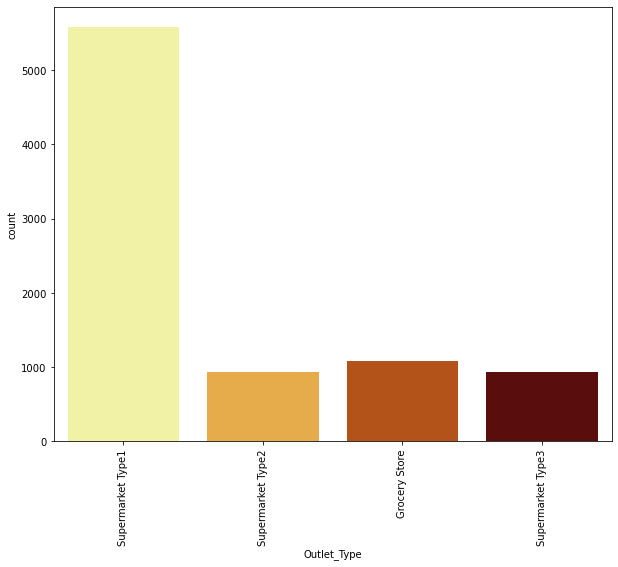

In [105]:
#look value_count in Outlet_type visually  
plt.figure(figsize=(10,8))
sns.countplot(traindata.Outlet_Type,palette='afmhot_r')
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'Item_Visibility and Item_Outlet_Sales Analysis'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

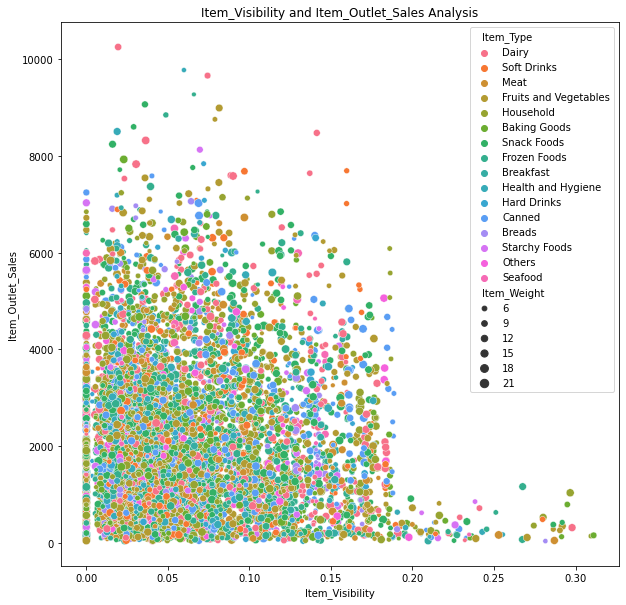

In [106]:
plt.figure(figsize=(10,10))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=traindata)

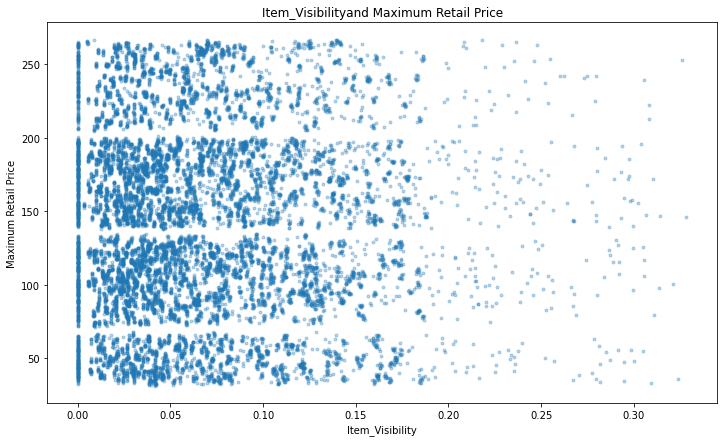

In [107]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibilityand Maximum Retail Price')
plt.plot(df['Item_Visibility'],df['Item_MRP'],'.',alpha=0.3)

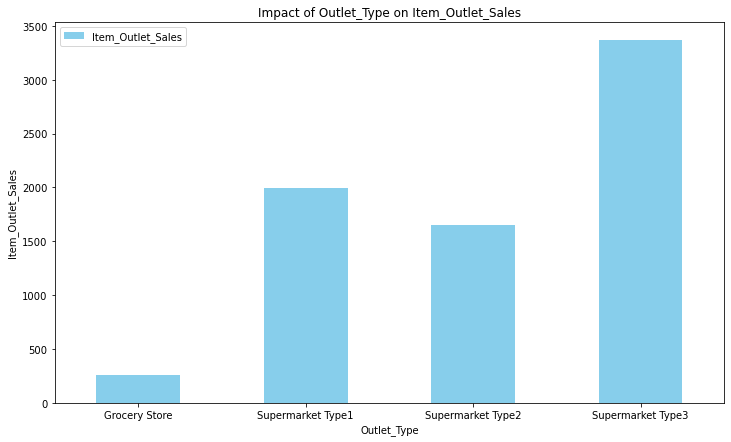

In [108]:
Outlet_Type_pivot=\
traindata.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar',color='skyblue',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Type on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

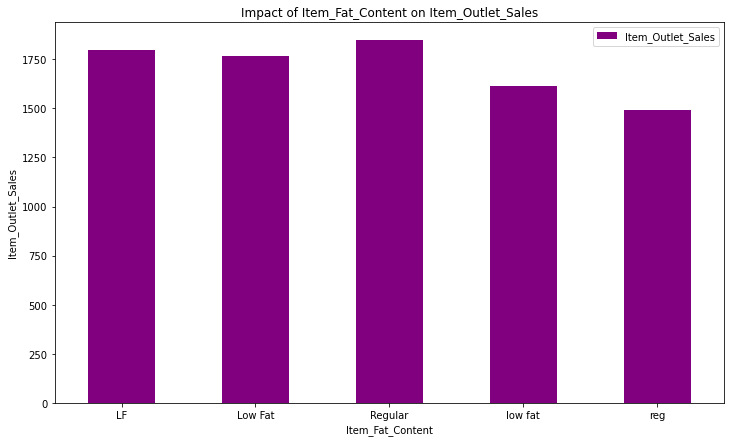

In [109]:
Outlet_Type_pivot=\
traindata.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar',color='purple',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [110]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [111]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [112]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [113]:
traindata['Item_Fat_Content']=traindata['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

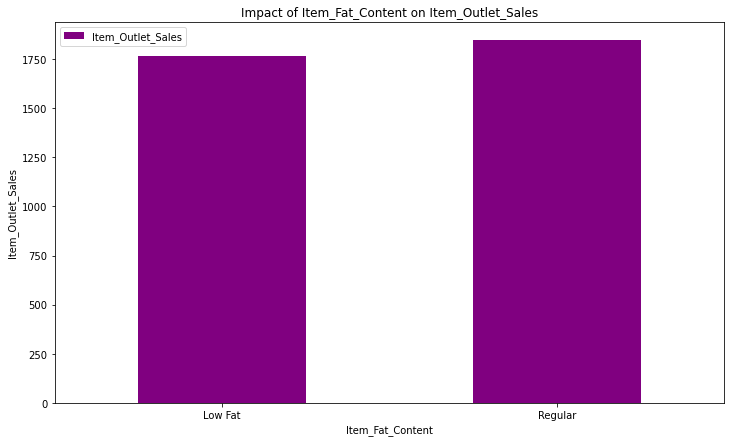

In [114]:
Outlet_Type_pivot=\
traindata.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar',color='purple',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

Regular is higher than the low fat

In [115]:
traindata.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


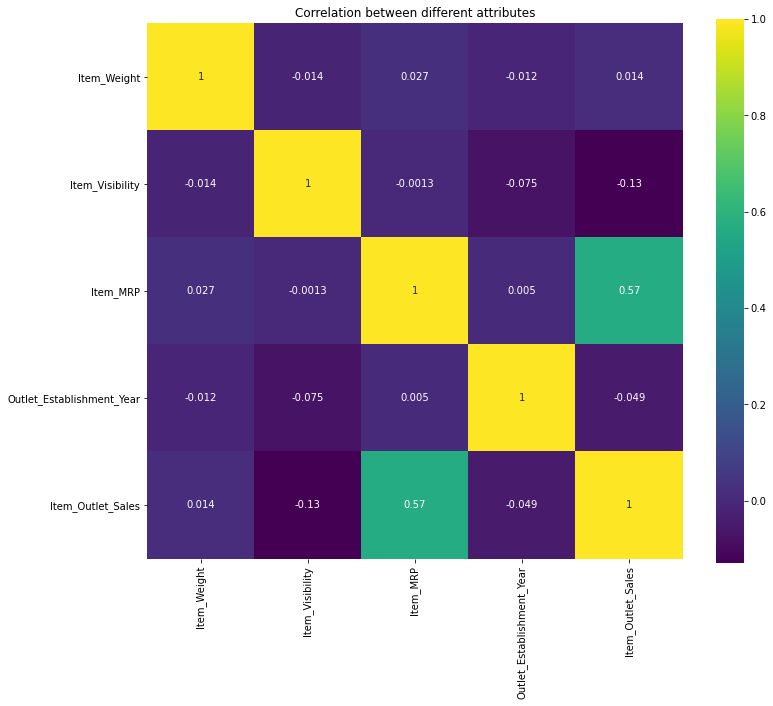

In [116]:
plt.figure(figsize=(12,10))
sns.heatmap(traindata.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

# Treating the missing values

In [117]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

we have null values in 3 columns Item_Weight,Outlet_Size and Item_Outlet_Sales

# handling missing values in Item_Weight

In [118]:
#we will rplace the NaN values with this mean
df['Item_Weight'].mean()

12.792854228644991

In [119]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

# handling missing values in Outlet_Size

In [120]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Outlet_Size is a catogarical type son we have to fill with the mode here we get mode as medium so fill the missing values with the Medium

In [121]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [122]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

there are no null values except in Item_Outlet_Sales column

In [123]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [124]:
df['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

In [125]:
df['New_Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[0:2])
df['New_Item_Identifier']=df['New_Item_Identifier'].map({'FD':'Food','DR':'Drink','NC':'Non-Consumable'})
df['New_Item_Identifier'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_Identifier, dtype: int64

If a product is non-consumable then why associate a fat-content to them? we will get rid od this

In [126]:
df.loc[df['New_Item_Identifier']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Under normal circumstance, if a product is more visible,then it's likely it will be getting higher sales. We can based on that hypothesis and create importance give to a product in a given store according to the mean of signinficance to the same product in all other stories

In [127]:
Item_visib_avg=df.pivot_table(values='Item_Visibility',index='Item_Identifier')
Item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [128]:
function=lambda x:x['Item_Visibility']/Item_visib_avg['Item_Visibility'][Item_visib_avg.index==x['Item_Identifier']][0]
df['Item_visib_avg'] = df.apply(function,axis=1).astype(float)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Identifier,Item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drink,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,0.000000


# Encoding
Converting the all the categorical columns values to numerical values by using LableEncoder

In [129]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
New_Item_Identifier           object
Item_visib_avg               float64
dtype: object

In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
col = ['Item_Fat_Content', 'New_Item_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Type']
for col in col:
    df[col] = le.fit_transform(df[col])

In [131]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Identifier,Item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,train,1,0.931078,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0.933420,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,train,1,0.960069,9
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,train,1,0.000000,0
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,train,2,0.000000,1


now we need to create dummy variables for the LabelEncoded variable to avoid our algoritham ranking these labels

In [132]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','New_Item_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_visib_avg               float64
Outlet                         int32
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
New_Item_Identifier_0          uint8
New_Item_Identifier_1          uint8
New_Item_Identifier_2          uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
d

# Model Building

In [133]:
df=df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1)
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']
train.drop(['source','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
x_train=train.drop(['Item_Outlet_Sales'],axis=1)
y_train=train['Item_Outlet_Sales']
x_test=test

# Linear Regression

In [134]:
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [135]:
lr_pred=lr.predict(x_test)
lr_pred

array([1767.72215795, 1569.48091493, 1870.32959508, ..., 1882.01928351,
       3573.63745442, 1340.89085475])

In [136]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

56

# DecisionTreeRegressor

In [137]:
dt=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [138]:
dt_pred=dt.predict(x_test)
dt_pred

array([1545.86937383, 1412.15620504,  584.75776477, ..., 1771.68851587,
       3692.81910244, 1211.249992  ])

In [139]:
dt_accuracy=round(dt.score(x_train,y_train)*100)
dt_accuracy

62

# RandomForestRegressor

In [143]:
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_split=10)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_split=10, n_estimators=400)

In [141]:
rf_pred=rf.predict(x_test)
rf_pred

array([1650.93502176, 1358.91540276,  618.87820969, ..., 1985.69021234,
       3703.91800105, 1283.5000131 ])

In [142]:
rf_accuracy=round(rf.score(x_train,y_train)*100)
rf_accuracy

62

# GradientBoostingRegressor

In [144]:
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.7,max_depth=12)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.7, max_depth=12)

In [145]:
gbr_pred=gbr.predict(x_test)
gbr_pred

array([1203.08549164, 1344.1466611 ,  566.9170097 , ..., 1349.43929832,
       3839.54661453, 1397.64744708])

In [146]:
gbr_accuracy=round(gbr.score(x_train,y_train)*100)
gbr_accuracy

100

# conclusion
As per the project statement we have to find the prediction value of test data set with good accuracy of model.After doing all the process here we got the best predicted values by GradientBoostingRegressor with the 100 accuracy score

# Saving the best model

In [150]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('Big Data Mart Sales.pkl','wb')

In [151]:
#dump the information to the file
pickle.dump(gbr_accuracy,file)